<a href="https://colab.research.google.com/github/MusadaqTanvir/TensforFlowCodes/blob/main/01_Neural_Network_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network With TensorFlow

**Hyperparameters**
* input layer shape
* Hidden Layers
* Neuron per hidden layer
* Output Layer Shape
* Hidden Activation
* Output Activation
* Loss Function
* Optimizer

First of all we have to define our model using the parameters given above and then we have to compile our model.
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


#Creating Data to view and fit to it

In [2]:
import numpy as np
import matplotlib.pyplot as plt

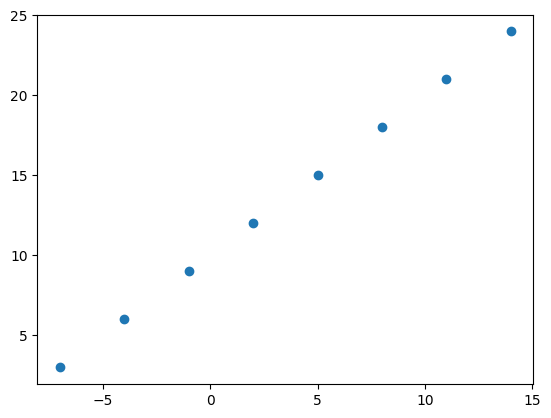

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

# Input and Output Shape

In [4]:
# Create a demo tensor for our housig price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
# Checking the shape of input and output
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
# Since both input and output are now scalers in this problem
X[0].ndim

0

In [8]:
# Turing Numpy Array into Tensors
X = tf.constant(X)
y = tf.constant(y)

In [9]:
X.shape, y.shape
X.ndim

1

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

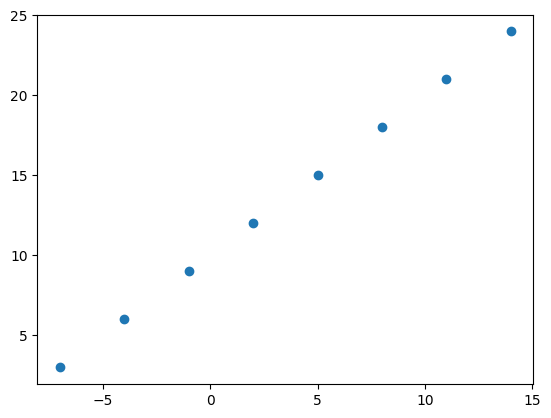

In [11]:
plt.scatter(X,y)

### so we have figured that we will have only 1 input feature and 1 output feature(regression)

# Steps in Modeling with TensorFlow
* **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
* **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
* **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [12]:
#X = tf.reshape(X,shape=[X.shape[0],1])
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [18]:
# Create the model using the sequential API
"""
We can provide list of model structure as given below as well as we can add sequentially my calling add method of keras class.
"""
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=(1,))
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 216ms/step - loss: 8.4032 - mae: 8.4032
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 8.2707 - mae: 8.2707
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 8.1382 - mae: 8.1382
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 8.0057 - mae: 8.0057
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 7.8732 - mae: 7.8732


In [19]:
# Check again X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Lets make predictions
model.predict([11.0])

1/1 [==============================] - 0s 102ms/step


array([[17.993486]], dtype=float32)

#Improving our model

We add just one neuron and same used for ouput also thats why we are getting worse results.
We can improve the model by altering the steps we took to create the model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [27]:
#1 Lets recreate the model again
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 251ms/step - loss: 18.3137 - mae: 18.3137
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 18.0325 - mae: 18.0325
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 17.7512 - mae: 17.7512
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 17.4700 - mae: 17.4700
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 17.1887 - mae: 17.1887
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 16.9075 - mae: 16.9075
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 16.6262 - mae: 16.6262
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 16.3450 - mae: 16.3450
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 16.0637 - mae: 16.0637
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 15.7825 - mae: 15.7825
Epoch 11/100
1/1 [==============================] - 0s 8

In [28]:
# Lets see our data first
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [29]:
# Lets again do prediction
model.predict([17.0])

1/1 [==============================] - 0s 78ms/step


array([[29.589136]], dtype=float32)

In [40]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=(1,)),
    tf.keras.layers.Dense(units=50,activation=None),
    tf.keras.layers.Dense(units=1)
])

# Compile the model again with changes
model.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['mae'])

# Fit the model created
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 687ms/step - loss: 13.7108 - mae: 13.7108
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6557 - mae: 13.6557
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6007 - mae: 13.6007
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5458 - mae: 13.5458
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4911 - mae: 13.4911
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4366 - mae: 13.4366
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3821 - mae: 13.3821
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3278 - mae: 13.3278
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2734 - mae: 13.2734
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2190 - mae: 13.2190
Epoch 11/100
1/1 [==============================] - 0s 7m

In [41]:
# Lets predict the output
model.predict([11.0])

1/1 [==============================] - 0s 70ms/step


array([[19.704342]], dtype=float32)

In [42]:
model.predict([17.0])

1/1 [==============================] - 0s 25ms/step


array([[29.690493]], dtype=float32)

**Warning**: What do you notice in previous 2 predictions?. The model predicts the 11's answer exactly correct but 17's wrong. Because the Model gets overfitted during training and memorizes the data points

# Evaluating the Model
In practice, a typical workflow you'll go through when building neural networks is:

Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
When it comes to evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

#Making the Bigger Data

In [43]:
data = tf.range(-100,100,4)

In [44]:
data

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [45]:
# Labeling the data with specific pattern
y = data+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

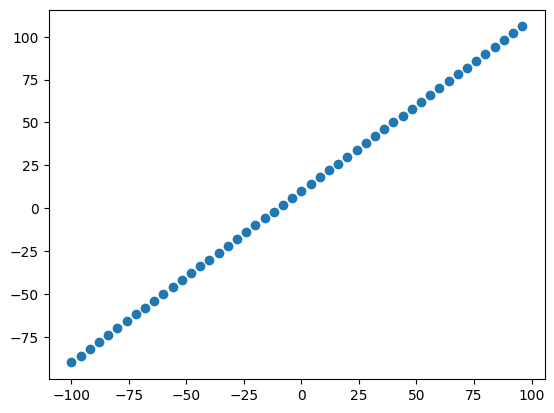

In [49]:
# Viualize the data
plt.scatter(data,y)

In [61]:
X_train = data[:40]
y_train = y[:40]
X_test = data[40:]
y_test = y[40:]

# The 3 Sets
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [62]:
len(X_train), len(X_test)

(40, 10)

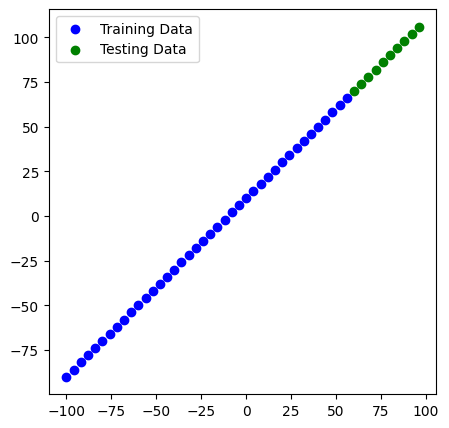

In [63]:
# Plotting Testing and Training data
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train,c='b',label="Training Data")
plt.scatter(X_test,y_test,c='g',label="Testing Data")
plt.legend()

In [86]:
# Let's create a neural network for our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=(1,),name="input_layer"),
    tf.keras.layers.Dense(units=1,name="output_layer")
],name="MyModel")

model.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#model.fit(X_train,y_train,epochs=100)

# Visualize the Model

In [87]:
model.summary()

Model: "MyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - total number of parameters in the model.
**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
**Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).
📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

In [82]:
#Lets fit the model to the data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# Let's plot the model
from tensorflow.keras.utils import plot_model

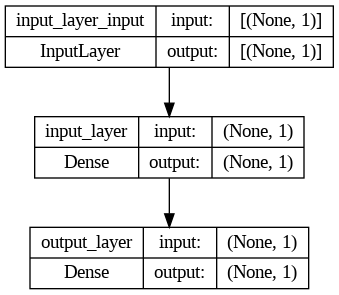

In [88]:
plot_model(model=model,show_shapes=True)

# Visualizing our Model's Predictions